In [3]:
import numpy
import matplotlib.pyplot
%matplotlib inline

In [ ]:
data_file = open("mnist_dataset/mnist_train.csv", "r")
data_list = data_file.readlines()
data_file.close()

In [5]:
len(data_list)

100

In [6]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

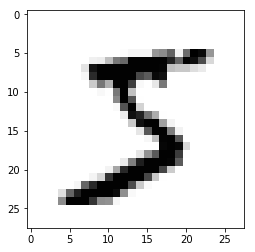

In [8]:
all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [9]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
print(scaled_input)

[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.

In [10]:
# output node is 10
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
print(targets)

[ 0.01  0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01]


In [19]:
import numpy
#sigmoid 함수 불러오기
import scipy.special
# 행렬을 시각화하기 위한 라이브러리
import matplotlib.pyplot
%matplotlib inline

#신경망 클래스의 정의
class neuralNetwork:
    # 신경망 초기화 하기
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #입력, 은닉, 출력 노드 갯수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 가중치 행렬 Wih 와 Who
        #배열 내 가중치는 w_i_j로 표기
        #w11 w21
        #w12 W22 등
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        #학습률
        self.lr = learningrate
        
        #활성화 함수로는 시그모이드 함수를 이용
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    #신경망 학습시키기
    def train(self, inputs_list, targets_list):
        #입력 리스트를 2차원의 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #은닉계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        #은닉계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #출력계층으로 들오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #출력계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제값 - 계산값)
        output_errors = targets - final_outputs
        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # 은닉계층과 출력계층 간의 가중치 업데이트(역전파)
        self.who += self.lr*numpy.dot((output_errors*final_outputs*(1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # 입력계층과 은닉계층 간의 가중치 업데이트(역전파)
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # 신경망에 질의하기
    def query(self, inputs_list):
        
        # 입력리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 은닉계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 출력계층으로 들오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 출력계층으로 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    pass

# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 학습률은 0.3
learningrate = 0.3

#신경망의 인스턴스 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learningrate)

# mnist 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#신경망 합습시키기

# 학습데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
    #레코드를 쉼포에 의해 분리
    all_values = record.split(',')
    # 입력값의 법위와 값 조정
    inputs = (numpy.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
    # 결과값 생성(실제 값인 0.99 외에는 모드 0.01)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] 은 이 레코드에 대한 결과 값
    targets[int(all_values[0])] = 0.99

    n.train(inputs, targets)

    pass

In [20]:
# load the mnist test data csv file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
# get the first test record
all_values = test_data_list[0].split(',')
# print the label
print(all_values[0])

7


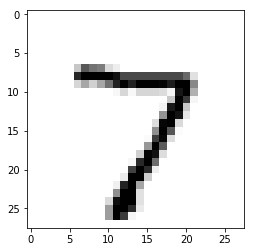

In [21]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation='None')

In [22]:
n.query((numpy.asfarray(all_values[1:]) / 255.0*0.99) + 0.01)

array([[ 0.03599839],
       [ 0.01176556],
       [ 0.02578927],
       [ 0.07340736],
       [ 0.08192971],
       [ 0.01748589],
       [ 0.01428549],
       [ 0.79557938],
       [ 0.03172525],
       [ 0.02250928]])